First we have import the all required library 

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

Now we have import our Happiness_Score_dataset

In [3]:
df= pd.read_csv("happiness_score_dataset.csv")

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


 Used iloc command to get the Happiness score at the columns.

In [5]:
df=df.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,3]]    
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


we have use LabelEncoder to encode the Region columns 

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Region']=le.fit_transform(df['Region'])  

In [7]:
df.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


Now we have find the null value in our dataset

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

we have seen that their is no null value in our dataset

now we have check data type of dataset

In [9]:
df.dtypes

Country                           object
Region                             int32
Happiness Rank                     int64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness Score                  float64
dtype: object

In [10]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
Happiness Score                  157
dtype: int64

<AxesSubplot:>

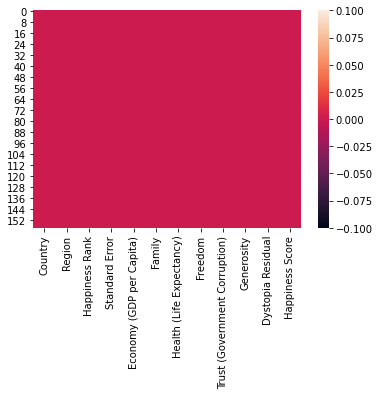

In [11]:
sns.heatmap(df.isnull())

as we seen in heatmap, all the columns filled with the data, no column have null value. so we can proceed futher analysis.

Now we have use scatter plot to check the data distribution 

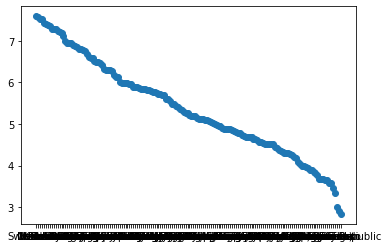

In [12]:
x=plt.scatter(df['Country'],df['Happiness Score'])
x

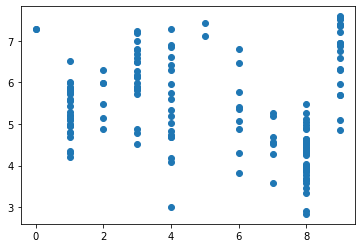

In [13]:
x1=plt.scatter(df['Region'],df['Happiness Score'])
x1

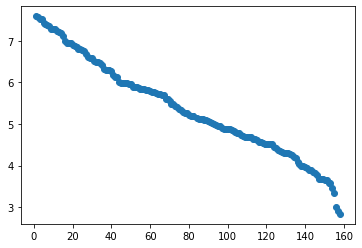

In [14]:
x2=plt.scatter(df['Happiness Rank'],df['Happiness Score'])
x2

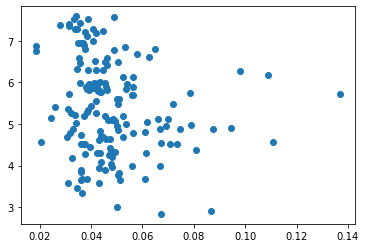

In [15]:
x3=plt.scatter(df['Standard Error'],df['Happiness Score'])
x3

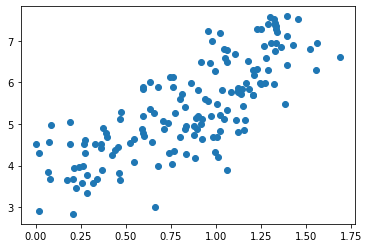

In [16]:
x4=plt.scatter(df['Economy (GDP per Capita)'],df['Happiness Score'])
x4

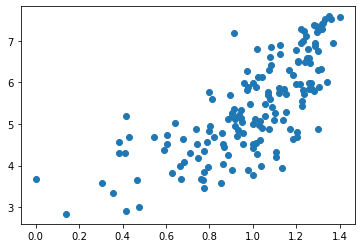

In [17]:
x5=plt.scatter(df['Family'],df['Happiness Score'])
x5

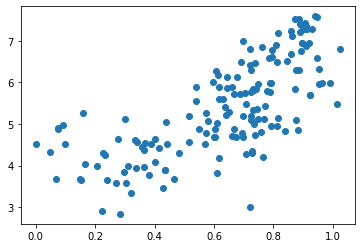

In [18]:
x6=plt.scatter(df['Health (Life Expectancy)'],df['Happiness Score'])
x6

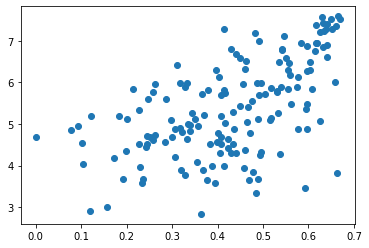

In [19]:
x7=plt.scatter(df['Freedom'],df['Happiness Score'])
x7

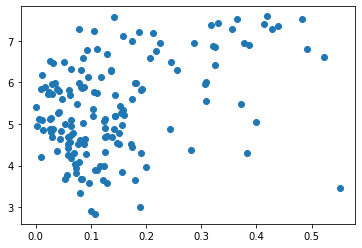

In [20]:
x8=plt.scatter(df['Trust (Government Corruption)'],df['Happiness Score'])
x8

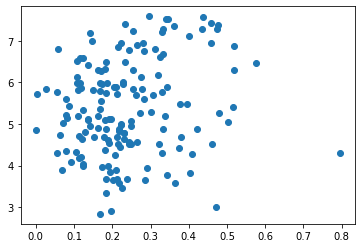

In [21]:
x9=plt.scatter(df['Generosity'],df['Happiness Score'])
x9

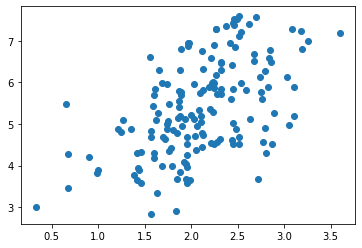

In [22]:
x10=plt.scatter(df['Dystopia Residual'],df['Happiness Score'])
x10

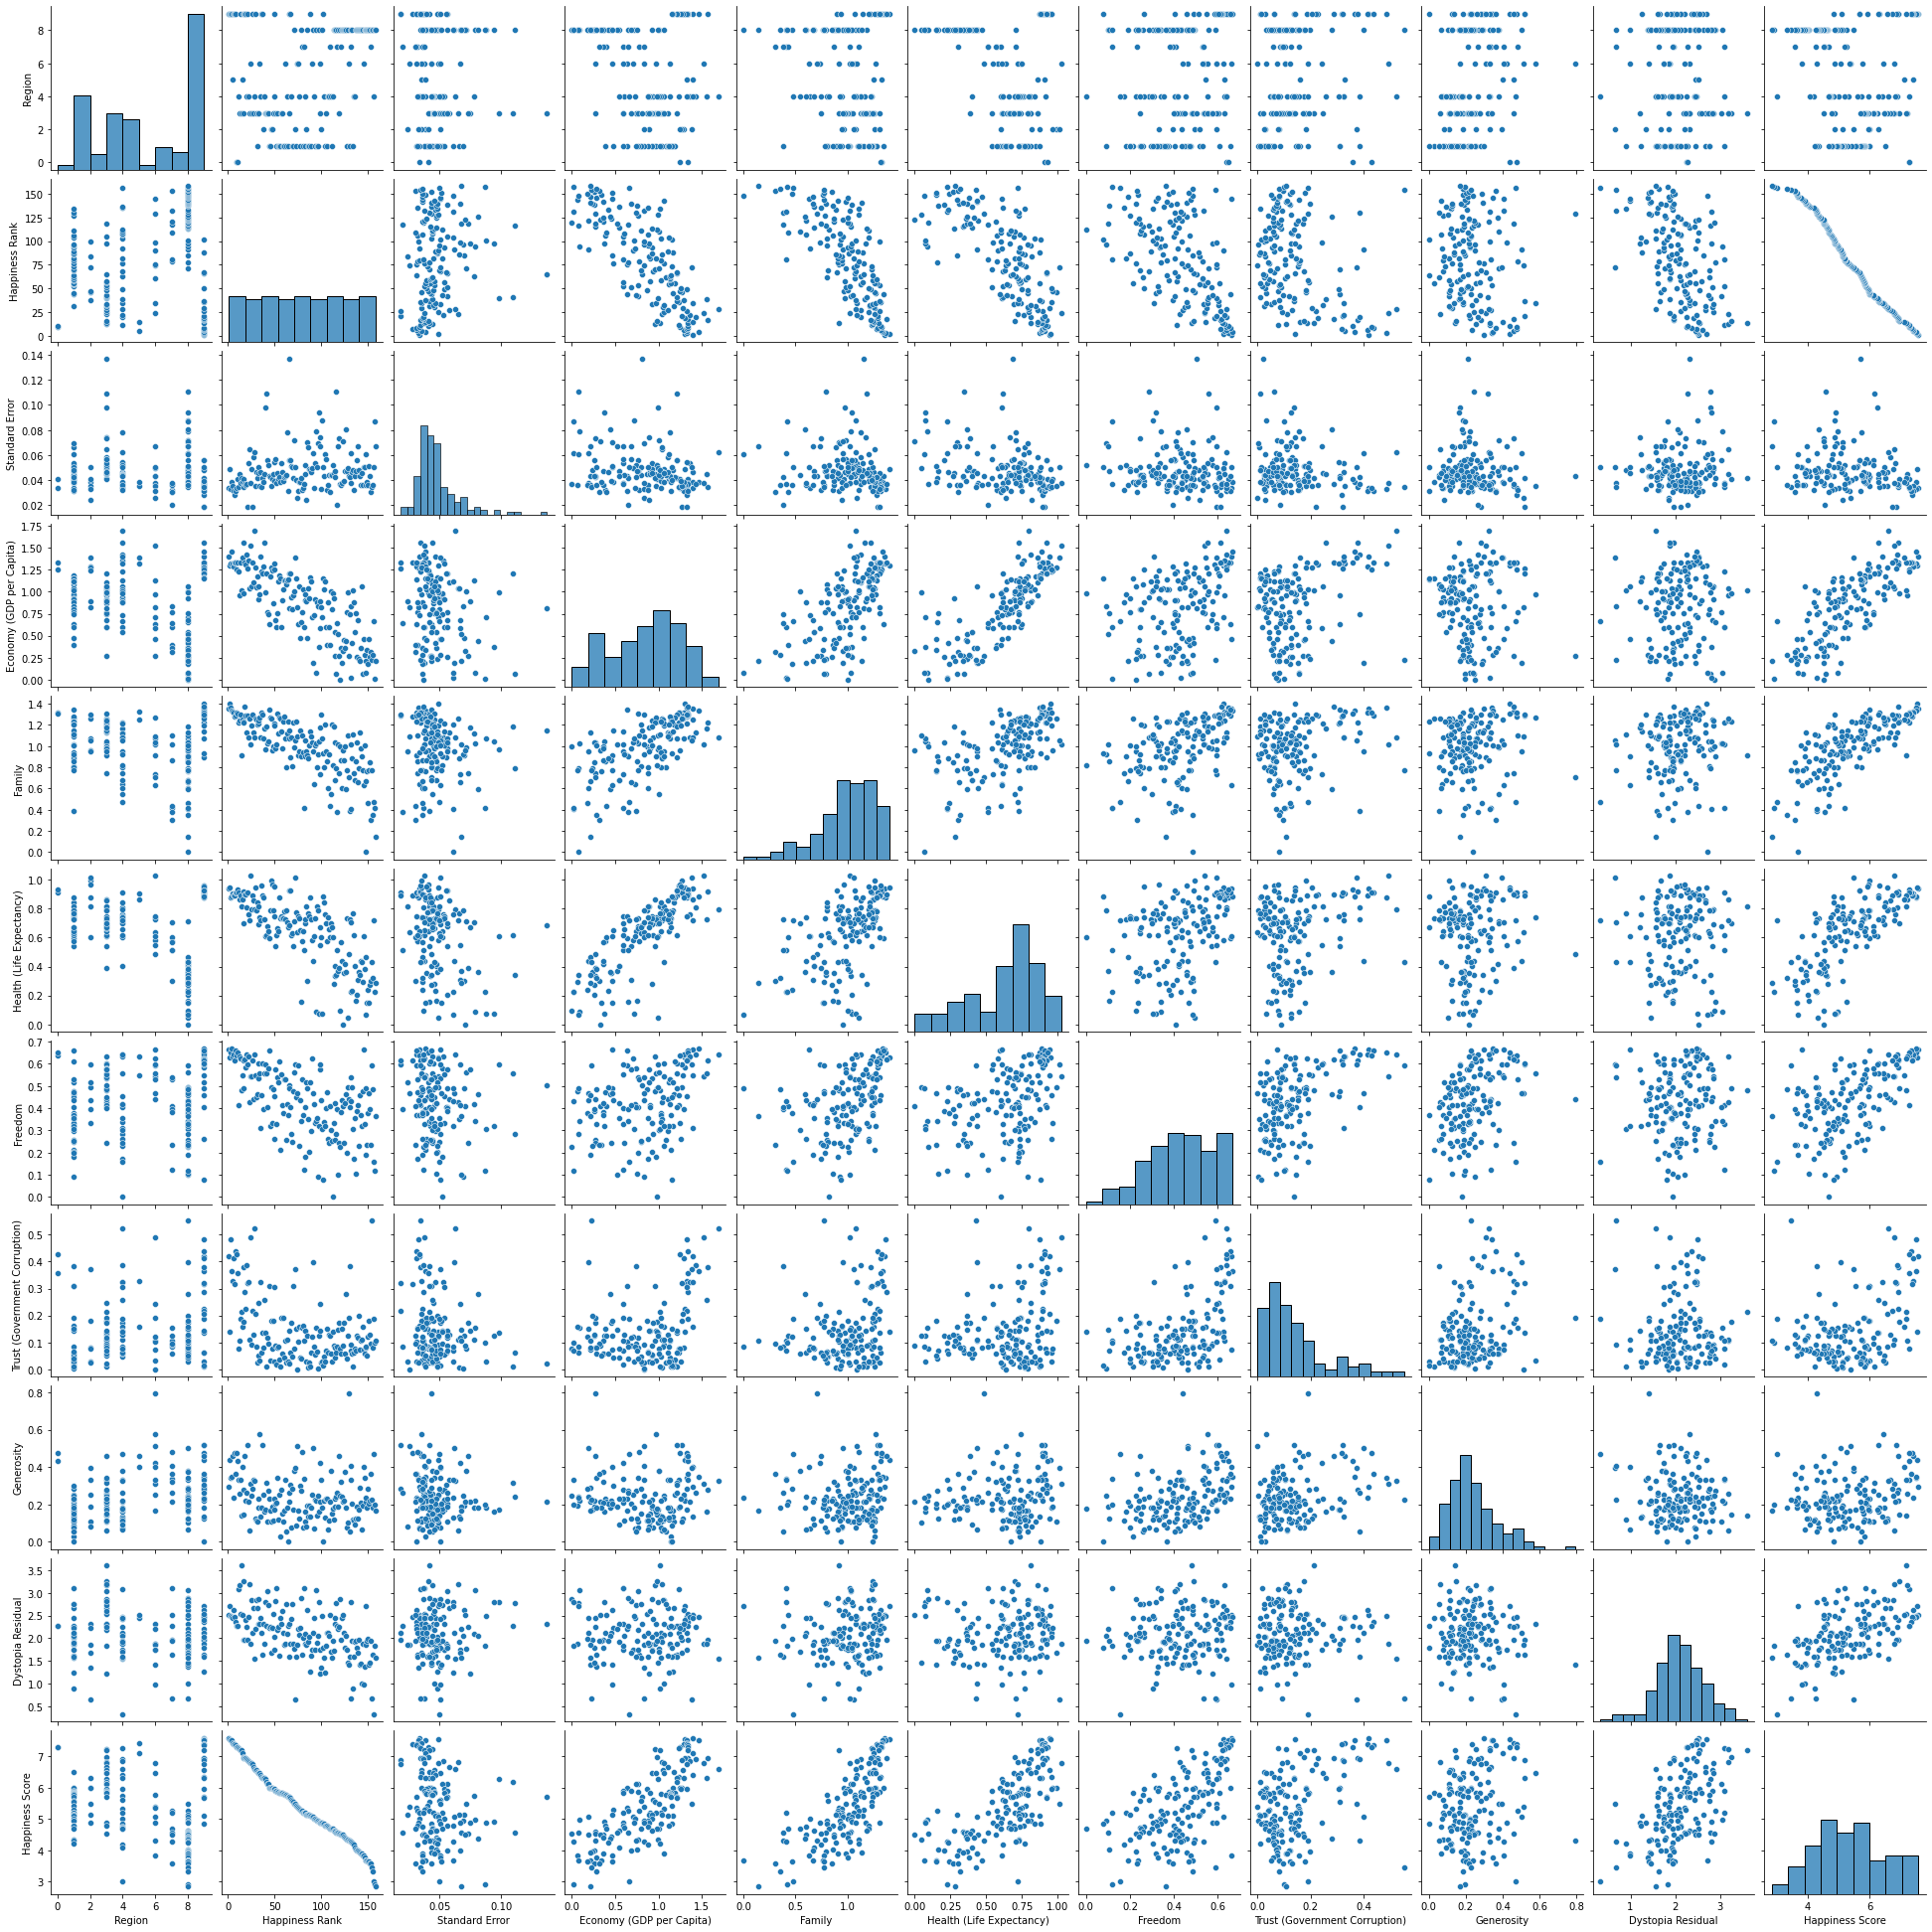

In [23]:
sns.pairplot(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int32(1), int64(1), object(1)
memor

In [25]:
df.describe()

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.120253,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,2.993321,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,0.000000,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,3.000000,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,4.500000,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,8.000000,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,9.000000,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


In [26]:
df.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
Happiness Score                  0.097769
dtype: float64

Region                              AxesSubplot(0.125,0.125;0.0596154x0.755)
Happiness Rank                   AxesSubplot(0.196538,0.125;0.0596154x0.755)
Standard Error                   AxesSubplot(0.268077,0.125;0.0596154x0.755)
Economy (GDP per Capita)         AxesSubplot(0.339615,0.125;0.0596154x0.755)
Family                           AxesSubplot(0.411154,0.125;0.0596154x0.755)
Health (Life Expectancy)         AxesSubplot(0.482692,0.125;0.0596154x0.755)
Freedom                          AxesSubplot(0.554231,0.125;0.0596154x0.755)
Trust (Government Corruption)    AxesSubplot(0.625769,0.125;0.0596154x0.755)
Generosity                       AxesSubplot(0.697308,0.125;0.0596154x0.755)
Dystopia Residual                AxesSubplot(0.768846,0.125;0.0596154x0.755)
Happiness Score                  AxesSubplot(0.840385,0.125;0.0596154x0.755)
dtype: object

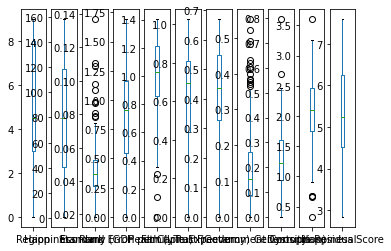

In [31]:
df.plot(kind='box',subplots=True,layout=(1,11))

Here we observed our data is having outliers.

we have observ that the country and happiness rank don't affect the output happiness score so we have drop Country and Happiness Rank columns

In [32]:
df=df.drop(['Country','Happiness Rank'],axis=1) # drop Country and Happiness Rank columns because these columns don;t affect the output.
df

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


<AxesSubplot:xlabel='Region', ylabel='Density'>

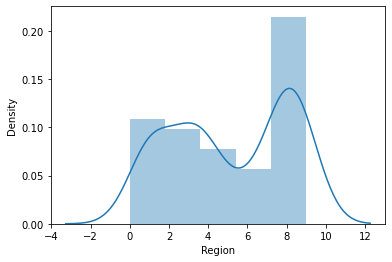

In [33]:
sns.distplot(df['Region'])

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

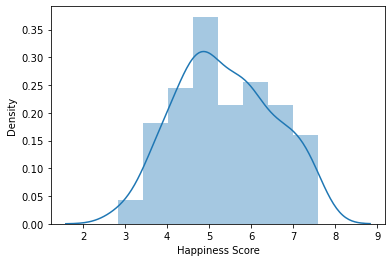

In [34]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

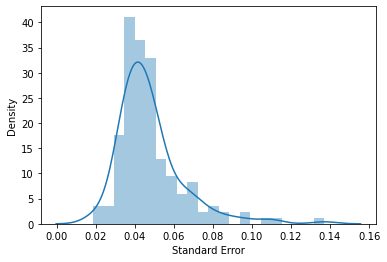

In [35]:
sns.distplot(df['Standard Error'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

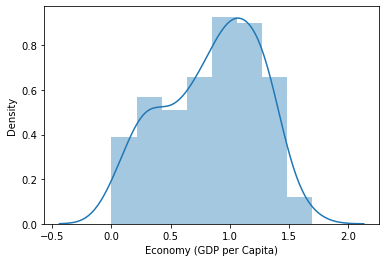

In [36]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

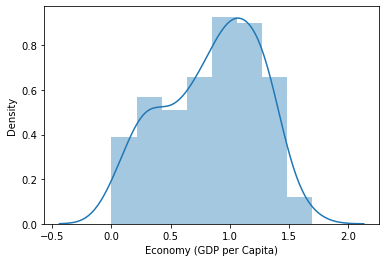

In [37]:
sns.distplot(df['Economy (GDP per Capita)'])

<AxesSubplot:xlabel='Family', ylabel='Density'>

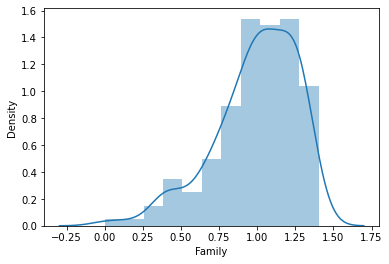

In [38]:
sns.distplot(df['Family'])

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

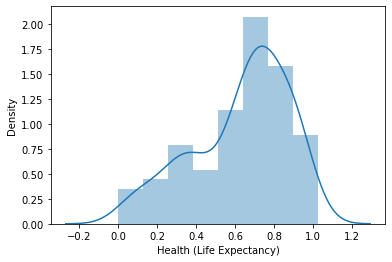

In [39]:
sns.distplot(df['Health (Life Expectancy)'])

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

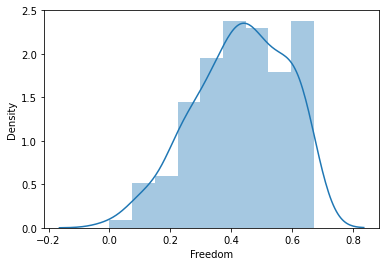

In [40]:
sns.distplot(df['Freedom'])

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

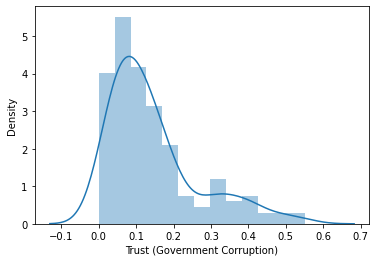

In [41]:
sns.distplot(df['Trust (Government Corruption)'])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

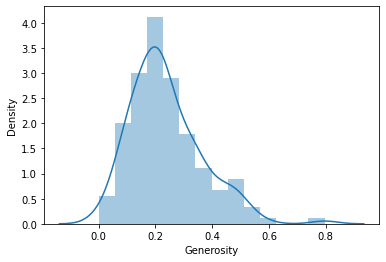

In [42]:
sns.distplot(df['Generosity'])

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

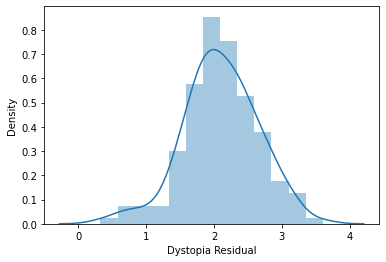

In [43]:
sns.distplot(df['Dystopia Residual'])

Using distplot we have observed that data is having skewness.

In [44]:
df.corr()

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Region,1.000000,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276,-0.176791
Standard Error,-0.022600,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.260139,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.168533,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.357508,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,0.092567,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),0.165040,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,0.273557,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.057276,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.176791,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


<AxesSubplot:>

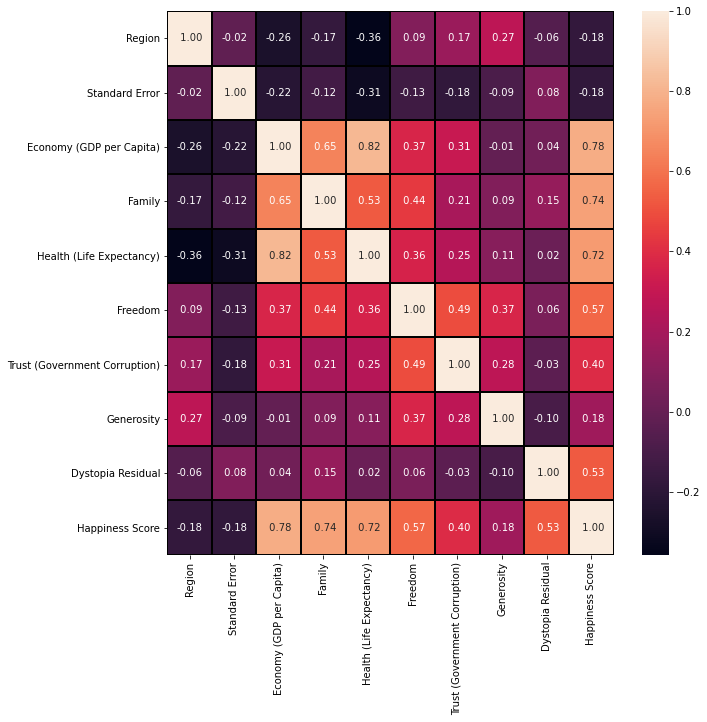

In [47]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=1,linecolor='black',fmt=' .2f')

Here Region , Standard error are having very less relationship with target.

Economy (GDP per Capita),Health (Life Expectancy),Family, Trust (Government Corruption), Dystopia Residual Happiness Having strog relationship.

Removing outliers

In [48]:
from scipy.stats import zscore

In [49]:
z=np.abs(zscore(df))
z


array([[1.30025593, 0.80592569, 1.36962124, ..., 0.47103971, 0.75825809,
        1.93736005],
       [1.30025593, 0.05588945, 1.13522625, ..., 1.57585637, 1.09285682,
        1.91458063],
       [1.30025593, 0.8544869 , 1.19286069, ..., 0.8242928 , 0.71233526,
        1.88479215],
       ...,
       [0.37544095, 0.13253425, 0.45524543, ..., 1.85689094, 3.20843049,
        2.0761992 ],
       [0.96511655, 2.26396166, 2.06756644, ..., 0.31694987, 0.48198451,
        2.1646885 ],
       [0.96511655, 1.13418227, 1.58633379, ..., 0.5581534 , 0.96361241,
        2.22251319]])

In [50]:
z.shape

(158, 10)

In [51]:
threshold= 3 
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [52]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 10)
(149, 10)


In [53]:
Loss_percentage=(158-149)/158*100
Loss_percentage

5.69620253164557

Now split data in dependent and indipendent variable

In [54]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [55]:
x.shape


(158, 9)

In [56]:
y.shape

(158,)

In [57]:
data1=pd.DataFrame(data=x)
data1

,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,8,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,4,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,8,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [58]:
from sklearn.preprocessing import power_transform

In [59]:
x=power_transform(x,method='yeo-johnson')

In [60]:
x

array([[ 1.24453048, -0.9722262 ,  1.44606101, ...,  1.77399061,
         0.62239051,  0.75099154],
       [ 1.24453048,  0.30934969,  1.17332111, ...,  0.31599326,
         1.48099498,  1.11001108],
       [ 1.24453048, -1.06201662,  1.23983557, ...,  1.90679207,
         0.92797276,  0.70227525],
       ...,
       [-0.30300992,  0.39913742, -0.5134688 , ...,  0.73891461,
         1.65933595, -2.86621557],
       [ 0.95510156,  1.92690194, -1.89495386, ..., -0.15194624,
        -0.19482942, -0.51480136],
       [ 0.95510156,  1.31032295, -1.52122584, ..., -0.06732623,
        -0.49041465, -0.97664547]])

In [61]:
from sklearn.preprocessing import StandardScaler 

In [62]:
sdc=StandardScaler()
xsdc=sdc.fit_transform(x)

In [63]:
x=pd.DataFrame(xsdc)

In [64]:
x

,0,1,2,3,4,5,6,7,8
0,1.244530,-0.972226,1.446061,1.669206,1.491765,1.756335,1.773991,0.622391,0.750992
1,1.244530,0.309350,1.173321,2.012132,1.532348,1.439946,0.315993,1.480995,1.110011
2,1.244530,-1.062017,1.239836,1.739586,1.085223,1.615733,1.906792,0.927973,0.702275
3,1.244530,-0.503610,1.630246,1.553118,1.147600,1.792821,1.624007,0.964080,0.651035
4,0.030337,-0.823548,1.242168,1.501726,1.270179,1.475479,1.503484,1.592224,0.625118
...,...,...,...,...,...,...,...,...,...
153,0.955102,-0.916014,-1.494046,-0.959885,-0.939459,1.135229,2.012856,0.065304,-2.393259
154,0.955102,-0.719479,-1.360829,-1.896644,-1.276496,0.307514,-0.433835,-0.334169,-0.863565
155,-0.303010,0.399137,-0.513469,-1.690664,0.262933,-1.668658,0.738915,1.659336,-2.866216
156,0.955102,1.926902,-1.894954,-1.796803,-1.525700,-1.849903,-0.151946,-0.194829,-0.514801


methods to perform training and testing of the data.

In [65]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
lm=LinearRegression()
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Splitting the dataFrame

In [66]:
for i in range(0, 500):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lm.fit(x_train,y_train)
    pred_train= lm.predict(x_train)
    pred_test= lm.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At Random state",i, "The model perform very well")
        print("At random State:",i)
        print("Training r2_score",r2_score(y_train,pred_train)*100)
        print("testing r2 score ",r2_score(y_test,pred_test)*100)

At Random state 0 The model perform very well
At random State: 0
Training r2_score 99.2885897613442
testing r2 score  99.30725099239369
At Random state 1 The model perform very well
At random State: 1
Training r2_score 99.28498773138148
testing r2 score  99.28058256724391
At Random state 6 The model perform very well
At random State: 6
Training r2_score 99.26762862759715
testing r2 score  99.33308807223423
At Random state 11 The model perform very well
At random State: 11
Training r2_score 99.27912034731375
testing r2 score  99.31494773857247
At Random state 68 The model perform very well
At random State: 68
Training r2_score 99.28681454938278
testing r2 score  99.31069133082046
At Random state 69 The model perform very well
At random State: 69
Training r2_score 99.28532571955976
testing r2 score  99.26434382723819
At Random state 89 The model perform very well
At random State: 89
Training r2_score 99.26500882661162
testing r2 score  99.27895972356838
At Random state 109 The model perf

Here we observed best rabdom stat is 182 giving high value of r2 score

In [69]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=182)

In [70]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]


In [71]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    print(m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')

Here we are training and testing our data with multiple model to find out the best suitable model.

In [72]:
for i in models:
    create_model(i)

KNeighborsRegressor()
Mean absolute error 0.4035350000000001
Mean squared error 0.2396275570000001
Root Mean squared error 0.48951767792389284
R2 Score 0.7856914565322831
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.22820394726709187
Mean squared error 0.1605529718844053
Root Mean squared error 0.4006906186628348
R2 Score 0.856411032250518
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.5387000000000002
Mean squared error 0.4826835000000001
Root Mean squared error 0.6947542731066864
R2 Score 0.5683167698408756
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.06572059888338322
Mean squared error 0.007157972802661419
Root Mean squared error 0.08460480366185728
R2 Score 0.9935983375838535
--------------

In [73]:
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

Minimum Mean Absolute error is shown by  LinearRegression() 0.06572059888338322
Minimum Mean squared error is shown by  LinearRegression() 0.007157972802661419
Minimum Root Mean squared error is shown by  LinearRegression() 0.08460480366185728
Maximun R2 Score is shown by  LinearRegression() 0.9935983375838535


In [74]:
lrm=LinearRegression()
lrm.fit(x,y)

LinearRegression()

In [75]:
import pickle
filename='World_Happiness_Report.pkl'
pickle.dump(lrm,open(filename,'wb'))

Here we have saved LinearRegression as best fit model with r2 score 0.9935983371415406

In [76]:
import numpy as np
a=np.array(y_test)
predicted= np.array(lrm.predict(x_test))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,5.878,5.904081
1,4.874,4.946368
2,4.610,4.562747
3,5.833,5.820609
4,4.800,4.879195
5,7.226,7.334715
6,6.983,7.028110
7,5.984,6.048832
8,5.268,5.236130
9,4.194,4.166128


this is the orginal data and predicted data